In [ ]:
#import dependencies
import pandas as pd
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

In [ ]:
path = r'/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData'
all_x_files = glob.glob(path + "/subject_00*_*__x.csv")
all_x_time_files = glob.glob(path + "/subject_00*_*__x_time.csv")
all_y_files = glob.glob(path + "/subject_00*_*__y.csv")
all_y_time_files = glob.glob(path + "/subject_00*_*__y_time.csv")
li = []

print(sorted(all_x_files))
print("\n")
print(sorted(all_x_time_files))
print("\n")
print(sorted(all_y_files))
print("\n")
print(sorted(all_y_time_files))

['/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_01__x.csv', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_02__x.csv', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_03__x.csv', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_04__x.csv', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_05__x.csv', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_06__x.csv', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_07__x.csv', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_08__x.csv', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subjec

In [ ]:
gen_files=[]
for filename in sorted(all_x_files):
    gen= filename[:-7]
    #print(filename,gen)
    gen_files.append(gen)

print(gen_files)
subject_list=[]
for filename in gen_files:
    file=filename.split('/')[7]
    print(file) 
    subject_list.append(file)

['/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_01', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_02', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_03', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_04', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_05', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_06', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_07', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_08', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_01', '/content/drive/MyDrive/NN Dataset/ECE542_sp2

In [ ]:
path = r'/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData'
all_x_files = glob.glob(path + "/subject_00*_*__x.csv")
all_x_time_files = glob.glob(path + "/subject_00*_*__x_time.csv")
all_y_files = glob.glob(path + "/subject_00*_*__y.csv")
all_y_time_files = glob.glob(path + "/subject_00*_*__y_time.csv")
li = []

print(sorted(all_x_files))
print("\n")
print(sorted(all_x_time_files))
print("\n")
print(sorted(all_y_files))
print("\n")
print(sorted(all_y_time_files))

gen_files=[]
for filename in sorted(all_x_files):
    gen= filename[:-7]
    #print(filename,gen)
    gen_files.append(gen)

print(gen_files)
subject_list=[]
for filename in gen_files:
    file=filename.split('/')[7]
    print(file) 
    subject_list.append(file)

#Creating x meas and time csv and y label and time csv
for filename in gen_files:
    subject=filename.split('/')[7]
    df1=pd.read_csv(filename+'__x.csv',  names =['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
    df2=pd.read_csv(filename+'__x_time.csv', names =['time'])
    df1['time']=df2['time']
    df1['time']=df1['time'].apply(lambda x:int(x*100)/100)
    #df1['time']=df1['time'].apply(lambda x:format{x,".2f"})
    df1['time']=df1['time'].astype(str)
    df1.to_csv('/content/drive/MyDrive/NN Dataset/ProcessData/'+subject+'x_meas_time.csv',index=False)

## Making individual subject data files

Merge the x_meas and x_time file based on the time value
Merge the y_time and y_label file based on the time value

In [ ]:
#Creating x meas and time csv and y label and time csv
for filename in gen_files:
    subject=filename.split('/')[7]
    df1=pd.read_csv(filename+'__x.csv',  names =['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
    df2=pd.read_csv(filename+'__x_time.csv', names =['time'])
    df1['time']=df2['time']
    df1['time']=df1['time'].apply(lambda x:int(x*100)/100)
    #df1['time']=df1['time'].apply(lambda x:format{x,".2f"})
    df1['time']=df1['time'].astype(str)
    #df1['time'] = df1['time'].astype(str).str.encode('utf-8')
    df3=pd.read_csv(filename+'__y.csv', names =['label'])
    df4=pd.read_csv(filename+'__y_time.csv', names =['time'])
    df3['time']=df4['time']
    df3['time']=df3['time'].astype(str)
    #df3['time'] = df3['time'].astype(str).str.encode('utf-8')
    df1.to_csv('/content/drive/MyDrive/NN Dataset/ProcessData/'+subject+'x_meas_time.csv',index=False)
    df3.to_csv('/content/drive/MyDrive/NN Dataset/ProcessData/'+subject+'y_label_time.csv',index=False)

## Join x and y data on each subject and then interpolate the labels

Merge the x and y_data files.
After merging, we will observe that only 1/4th of total dataset is labelled. hence, we use interplolation technique to fill the other labels. 

In [ ]:
#Creating each subject final csv and interpolate the data 
for subject in subject_list:
    df1 = pd.read_csv('/content/drive/MyDrive/NN Dataset/ProcessData/'+subject+'x_meas_time.csv')
    df2 = pd.read_csv('/content/drive/MyDrive/NN Dataset/ProcessData/'+subject+'y_label_time.csv')
    df3 = pd.merge(df1, df2, on='time', how='outer')
    #print(df3)
    df3.to_csv('/content/drive/MyDrive/NN Dataset/Subject/'+subject+'final.csv',index=False)
    df3['label']=df3['label'].interpolate(method='pad')
    df4 = df3.loc[df3['time']!=0]
    df4.to_csv('/content/drive/MyDrive/NN Dataset/Interpolated/'+subject+'_interpolated.csv',index=False)

NameError: ignored

In [ ]:
#checking the shape of the csv created
df3 = pd.read_csv('/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_01__x_time.csv')
df4 = pd.read_csv('/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_01__x.csv')
df5 = pd.read_csv('/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_01__y_time.csv')
df6 = pd.read_csv('/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_01__y.csv')
print(df3.shape, df4.shape, df5.shape, df6.shape)
df1 = pd.read_csv('/content/drive/MyDrive/NN Dataset/ProcessData/subject_001_01x_meas_time.csv')
df2 = pd.read_csv('/content/drive/MyDrive/NN Dataset/ProcessData/subject_001_01y_label_time.csv')
print(df1.shape)
print(df2.shape)
df3=pd.read_csv('/content/drive/MyDrive/NN Dataset/Subject/subject_001_01final.csv')
print(df3.shape)
df3=pd.read_csv('/content/drive/MyDrive/NN Dataset/Interpolated/subject_001_01_interpolated.csv')
print(df3.shape)

(37889, 1) (37889, 6) (9472, 1) (9472, 1)
(37890, 7)
(9473, 2)


ParserError: ignored

## Merge all individual subject interpolated csv files to single file

The interpolated_combined.csv file will be our master file for training and validation.

In [ ]:
li=[]
path = r'/content/drive/MyDrive/NN Dataset/Interpolated' # use your path
all_files = glob.glob(path + "/*.csv")
for files in sorted(all_files):
    print(files)
    df = pd.read_csv(files, names =['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z','time','label'])
    li.append(df)
    
df1 = pd.concat(li, axis=0, ignore_index=True)
df2 = df1.loc[df1['acc_x']!='acc_x']
print(df1)
df2.to_csv('/content/drive/MyDrive/NN Dataset/Interpolated_Combined/Interpolated_combined.csv',index=False)

/content/drive/MyDrive/NN Dataset/Interpolated/subject_001_01_interpolated.csv
/content/drive/MyDrive/NN Dataset/Interpolated/subject_001_02_interpolated.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/content/drive/MyDrive/NN Dataset/Interpolated/subject_001_03_interpolated.csv
/content/drive/MyDrive/NN Dataset/Interpolated/subject_001_04_interpolated.csv
/content/drive/MyDrive/NN Dataset/Interpolated/subject_001_05_interpolated.csv
/content/drive/MyDrive/NN Dataset/Interpolated/subject_001_06_interpolated.csv
/content/drive/MyDrive/NN Dataset/Interpolated/subject_001_07_interpolated.csv
/content/drive/MyDrive/NN Dataset/Interpolated/subject_001_08_interpolated.csv
/content/drive/MyDrive/NN Dataset/Interpolated/subject_002_01_interpolated.csv
/content/drive/MyDrive/NN Dataset/Interpolated/subject_002_02_interpolated.csv
/content/drive/MyDrive/NN Dataset/Interpolated/subject_002_03_interpolated.csv
/content/drive/MyDrive/NN Dataset/Interpolated/subject_002_04_interpolated.csv
/content/drive/MyDrive/NN Dataset/Interpolated/subject_002_05_interpolated.csv
/content/drive/MyDrive/NN Dataset/Interpolated/subject_003_01_interpolated.csv
/content/drive/MyDrive/NN Dataset/Interpolated/subje

In [ ]:
# Checking the data imbalance
df=pd.read_csv('/content/drive/MyDrive/NN Dataset/Interpolated/subject_001_01_interpolated.csv')
walking = df[df.label==0].count()[0]
downstairs = df[df.label==1].count()[0]
upstairs = df[df.label==2].count()[0]
grass = df[df.label==3].count()[0]
print(walking, downstairs,upstairs, grass)

25773 2844 3152 6120


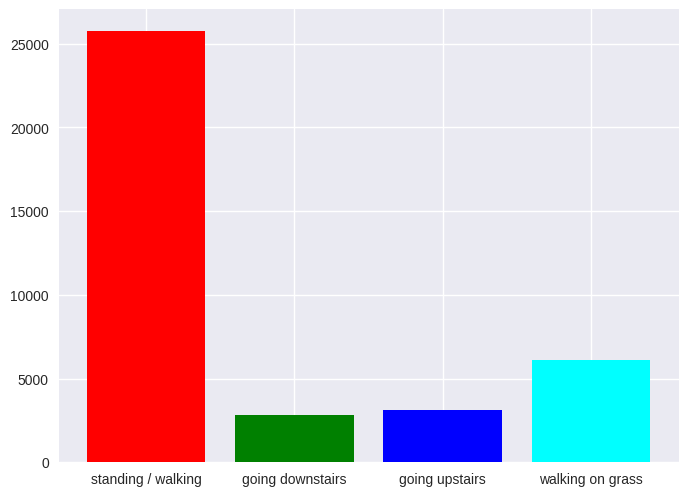

In [ ]:
# The data imbalance graph for subject 1
import matplotlib.pyplot as plt

text = ["standing / walking", "going downstairs","going upstairs", "walking on grass"]
label = [walking, downstairs,upstairs, grass]
color=[ 'red', 'green', 'blue', 'cyan']
plt.style.use('seaborn')
plt.figure(figsize=(8,6),dpi=100)
for bar in range(0,4):
    plt.bar(text[bar],label[bar], color=color[bar])

1006897 55216 73068 206436


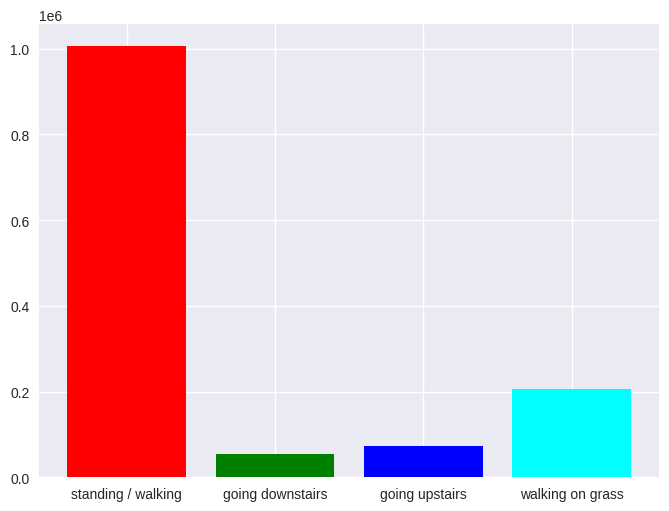

In [ ]:
# The data imbalance graph for entire dataset consisting of all subjects
df=pd.read_csv('/content/drive/MyDrive/NN Dataset/Interpolated_Combined/Interpolated_combined.csv')
walking_full = df[df.label==0].count()[0]
downstairs_full = df[df.label==1].count()[0]
upstairs_full = df[df.label==2].count()[0]
grass_full = df[df.label==3].count()[0]
print(walking_full, downstairs_full,upstairs_full, grass_full)

text = ["standing / walking", "going downstairs","going upstairs", "walking on grass"]
label = [walking_full, downstairs_full,upstairs_full, grass_full]
color=[ 'red', 'green', 'blue', 'cyan']
plt.style.use('seaborn')
plt.figure(figsize=(8,6),dpi=100)
for bar in range(0,4):
    plt.bar(text[bar],label[bar], color=color[bar])

In [ ]:
y_train = df.label
x_train= df.drop('label', axis=1)
print(y_train)
print("\n~~~~~~~")
print(x_train)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1341612    0.0
1341613    0.0
1341614    0.0
1341615    0.0
1341616    0.0
Name: label, Length: 1341617, dtype: float64

~~~~~~~
            acc_x     acc_y     acc_z    gyro_x    gyro_y    gyro_z     time
0        4.186920  8.344455  2.908057  0.005771 -0.004480 -0.003345     0.02
1        4.544637  8.408659  2.890000  0.007967  0.022412  0.001159     0.05
2        4.849308  8.411614  2.900692  0.027778 -0.010670 -0.014223     0.07
3        4.509190  8.118649  2.847298  0.021577 -0.045498 -0.021111     0.10
4        4.226515  8.273807  2.851742  0.012534  0.000445 -0.016830     0.12
...           ...       ...       ...       ...       ...       ...      ...
1341612  2.072244  8.908878 -3.500000  0.001351  0.001191  0.001031  1203.32
1341613  2.085123  8.915123 -3.520000  0.001918 -0.001147  0.000000  1203.34
1341614  2.083774  8.910000 -3.538981 -0.002015 -0.004099  0.001042  1203.37
1341615  2.

## Using SMOTE to balance the minority classes (1.0, 2.0, 3.0)

In [ ]:
from imblearn.over_sampling import SMOTE 
from collections import Counter


In [ ]:
county = Counter(y_train)
print(county)

Counter({0.0: 1006897, 3.0: 206436, 2.0: 73068, 1.0: 55216})


In [ ]:
sm = SMOTE(random_state=23)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
print(len(x_train_sm), len(y_train_sm))

county_sm = Counter(y_train_sm)
print(county_sm)

4027588 4027588
Counter({0.0: 1006897, 1.0: 1006897, 2.0: 1006897, 3.0: 1006897})


## Split into training and validation dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train_sm, y_train_sm, test_size=0.2,random_state=123)

In [ ]:
print(len(x_train), len(y_train))
print(len(x_val), len(y_val))

3222070 3222070
805518 805518


## Random Forest

In [ ]:
#Training the Random Forest model on training data
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import learning_curve

Random_F_model = RandomForestClassifier(n_estimators=20, random_state=0)
Random_F_model.fit(x_train, y_train)

KeyboardInterrupt: ignored

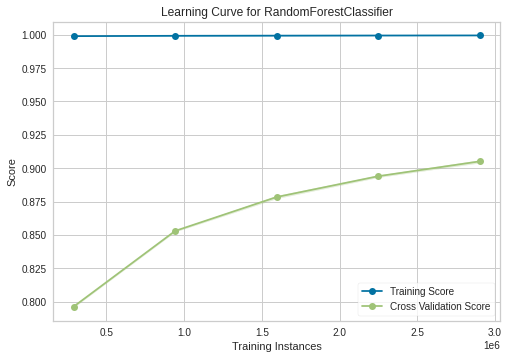

ValueError: ignored

In [ ]:
#Training the Random Forest model on training data
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import learning_curve

Random_F_model = RandomForestClassifier(n_estimators=20, random_state=0)
print(learning_curve(Random_F_model,x_train, y_train, cv=10, scoring='accuracy'))

In [ ]:
import pickle

saved_model_RF = '/content/drive/MyDrive/NN Dataset/Models/RF_model_smote.sav'
pickle.dump(Random_F_model, open(saved_model_RF, 'wb'))

In [ ]:
y_pred = Random_F_model.predict(x_val)


In [ ]:
#print(type(y_pred))
#print (type(y_val))
print('F1 Score:', metrics.f1_score(y_val, y_pred, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))
print('Precision score: ', metrics.precision_score(y_val, y_pred, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred, average='macro'))
print('Accuracy Score(macro):', metrics.accuracy_score(y_val, y_pred))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

F1 Score: 0.9097797768751095
Accuracy Score: 0.9108052209882337
Precision score:  0.9099234360466042
Recall score:  0.9107539838492922
Accuracy Score: 0.9108052209882337
Confusion Matrix: [[161095   7381   6098  26607]
 [  3229 195674   1023   1360]
 [  2317    783 197676    951]
 [ 17306   2417   2376 179225]]
Mean Absolute Error: 0.2133608435813973
Mean Squared Error: 0.5707234351063539
Root Mean Squared Error: 0.7554623982081133


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_neighbors=10)
KNN_Classifier.fit(x_train, y_train)

In [ ]:
import pickle

saved_model_KNN = '/content/drive/MyDrive/NN Dataset/Models/KNN_smote.sav'
pickle.dump(KNN_Classifier, open(saved_model_KNN, 'wb'))

In [ ]:
y_pred_KNN = KNN_Classifier.predict(x_val)
print('F1 score: ', metrics.f1_score(y_val, y_pred_KNN, average='macro'))

In [ ]:
print('F1 Score:', metrics.f1_score(y_val, y_pred_KNN, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_KNN))
print('Precision score: ', metrics.precision_score(y_val, y_pred_KNN, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred_KNN, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_KNN))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred_KNN))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_KNN))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_KNN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_KNN)))

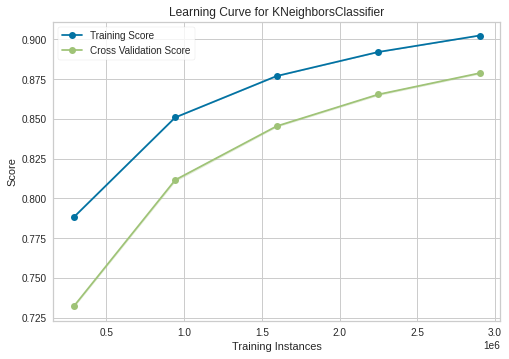

ValueError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_neighbors=10)
from yellowbrick.model_selection import learning_curve

print(learning_curve(KNN_Classifier,x_train, y_train, cv=10, scoring='accuracy'))

## Random Forest with estimator 40

In [ ]:
#Training the Random Forest model on training data
from sklearn.ensemble import RandomForestClassifier

Random_F_model_40 = RandomForestClassifier(n_estimators=40, random_state=0)
Random_F_model_40.fit(x_train, y_train)

RandomForestClassifier(n_estimators=40, random_state=0)

In [ ]:
x_test_009 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_009_01final_inner.csv')
x_test_010 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_010_01final_inner.csv')
x_test_011 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_011_01final_inner.csv')
x_test_012 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_012_01final_inner.csv')

y_pred_RF_009 = Random_F_model_40.predict(x_test_009)
y_pred_RF_010 = Random_F_model_40.predict(x_test_010)
y_pred_RF_011 = Random_F_model_40.predict(x_test_011)
y_pred_RF_012 = Random_F_model_40.predict(x_test_012)

In [ ]:
np.savetxt("TestResults/RF40/subject_009_01__y_prediction.csv", y_pred_RF_009, delimiter=",")
np.savetxt("TestResults/RF40/subject_010_01__y_prediction.csv", y_pred_RF_010, delimiter=",")
np.savetxt("TestResults/RF40/subject_011_01__y_prediction.csv", y_pred_RF_011, delimiter=",")
np.savetxt("TestResults/RF40/subject_012_01__y_prediction.csv", y_pred_RF_012, delimiter=",")

In [ ]:
y_pred_RF40 = Random_F_model_40.predict(x_val)

In [ ]:
print('F1 Score:', metrics.f1_score(y_val, y_pred_RF40, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_RF40))
print('Precision score: ', metrics.precision_score(y_val, y_pred_RF40, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred_RF40, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_RF40))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred_RF40))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_RF40))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_RF40))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_RF40)))

F1 Score: 0.915856516937698
Accuracy Score: 0.9169279891945308
Precision score:  0.9164699744704151
Recall score:  0.9168777622074374
Accuracy Score: 0.9169279891945308
Confusion Matrix: [[161565   7205   6074  26337]
 [  2723 196315    986   1262]
 [  1943    658 198177    949]
 [ 14475   2154   2150 182545]]
Mean Absolute Error: 0.19859643111637482
Mean Squared Error: 0.5309763406900901
Root Mean Squared Error: 0.7286812339357246


## Random Forest with estimator 60

In [ ]:
#Training the Random Forest model on training data
from sklearn.ensemble import RandomForestClassifier

Random_F_model_60 = RandomForestClassifier(n_estimators=60, random_state=0)
Random_F_model_60.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=0)

In [ ]:
x_test_009 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_009_01final_inner.csv')
x_test_010 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_010_01final_inner.csv')
x_test_011 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_011_01final_inner.csv')
x_test_012 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_012_01final_inner.csv')

y_pred_RF60_009 = Random_F_model_60.predict(x_test_009)
y_pred_RF60_010 = Random_F_model_60.predict(x_test_010)
y_pred_RF60_011 = Random_F_model_60.predict(x_test_011)
y_pred_RF60_012 = Random_F_model_60.predict(x_test_012)

In [ ]:
np.savetxt("TestResults/RF60/subject_009_01__y_prediction.csv", y_pred_RF60_009, delimiter=",")
np.savetxt("TestResults/RF60/subject_010_01__y_prediction.csv", y_pred_RF60_010, delimiter=",")
np.savetxt("TestResults/RF60/subject_011_01__y_prediction.csv", y_pred_RF60_011, delimiter=",")
np.savetxt("TestResults/RF60/subject_012_01__y_prediction.csv", y_pred_RF60_012, delimiter=",")

In [ ]:
y_pred_RF60 = Random_F_model_60.predict(x_val)

In [ ]:
print('F1 Score:', metrics.f1_score(y_val, y_pred_RF60, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_RF60))
print('Precision score: ', metrics.precision_score(y_val, y_pred_RF60, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred_RF60, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_RF60))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred_RF60))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_RF60))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_RF60))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_RF60)))

F1 Score: 0.9181688554609746
Accuracy Score: 0.9192494767342256
Precision score:  0.9189303249886663
Recall score:  0.9191997639831198
Accuracy Score: 0.9192494767342256
Confusion Matrix: [[161905   7143   6082  26051]
 [  2551 196562    948   1225]
 [  1860    610 198372    885]
 [ 13539   2047   2105 183633]]
Mean Absolute Error: 0.1929689963476918
Mean Squared Error: 0.5157029389783965
Root Mean Squared Error: 0.7181245985052988


## Random forest with estimator 100

In [ ]:
## Random Forest with estimator 100 
from sklearn.ensemble import RandomForestClassifier

Random_F_model_100 = RandomForestClassifier(n_estimators=100, random_state=0)
Random_F_model_100.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_RF100 = Random_F_model_100.predict(x_val)

In [ ]:
print('F1 Score:', metrics.f1_score(y_val, y_pred_RF100, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_RF100))
print('Precision score: ', metrics.precision_score(y_val, y_pred_RF100, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred_RF100, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_RF100))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred_RF100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_RF100))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_RF100))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_RF100)))

F1 Score: 0.9189096865720365
Accuracy Score: 0.9200104777298583
Precision score:  0.919829672079975
Recall score:  0.9199607377639372
Accuracy Score: 0.9200104777298583
Confusion Matrix: [[161759   7136   6092  26194]
 [  2435 196651    970   1230]
 [  1767    607 198424    929]
 [ 12959   2009   2105 184251]]
Mean Absolute Error: 0.19097897253692656
Mean Squared Error: 0.5101698534359257
Root Mean Squared Error: 0.7142617541461433


In [ ]:
x_test_009 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_009_01final_inner.csv')
x_test_010 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_010_01final_inner.csv')
x_test_011 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_011_01final_inner.csv')
x_test_012 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_012_01final_inner.csv')

y_pred_RF100_009 = Random_F_model_100.predict(x_test_009)
y_pred_RF100_010 = Random_F_model_100.predict(x_test_010)
y_pred_RF100_011 = Random_F_model_100.predict(x_test_011)
y_pred_RF100_012 = Random_F_model_100.predict(x_test_012)

In [ ]:
np.savetxt("TestResults/RF100/subject_009_01__y_prediction.csv", y_pred_RF100_009, delimiter=",")
np.savetxt("TestResults/RF100/subject_010_01__y_prediction.csv", y_pred_RF100_010, delimiter=",")
np.savetxt("TestResults/RF100/subject_011_01__y_prediction.csv", y_pred_RF100_011, delimiter=",")
np.savetxt("TestResults/RF100/subject_012_01__y_prediction.csv", y_pred_RF100_012, delimiter=",")

## XGBoost 

In [ ]:
from xgboost import XGBClassifier

# fit model on training data
XGB_model = XGBClassifier(learning_rate=0.1, n_estimators=20)
XGB_model.fit(x_train, y_train)

XGBClassifier(n_estimators=20, objective='multi:softprob')

In [ ]:
import pickle

saved_model_XGB = '/content/drive/MyDrive/NN Dataset/Models/XGB_smote.sav'
pickle.dump(XGB_model, open(saved_model_XGB, 'wb'))

In [ ]:
x_test_009 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_009_01final_inner.csv')
x_test_010 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_010_01final_inner.csv')
x_test_011 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_011_01final_inner.csv')
x_test_012 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_012_01final_inner.csv')

y_pred_XG_009 = XGB_model.predict(x_test_009)
y_pred_XG_010 = XGB_model.predict(x_test_010)
y_pred_XG_011 = XGB_model.predict(x_test_011)
y_pred_XG_012 = XGB_model.predict(x_test_012)

In [ ]:
np.savetxt("TestResults/XGB/subject_009_01__y_prediction.csv", y_pred_XG_009, delimiter=",")
np.savetxt("TestResults/XGB/subject_010_01__y_prediction.csv", y_pred_XG_010, delimiter=",")
np.savetxt("TestResults/XGB/subject_011_01__y_prediction.csv", y_pred_XG_011, delimiter=",")
np.savetxt("TestResults/XGB/subject_012_01__y_prediction.csv", y_pred_XG_012, delimiter=",")

In [ ]:
y_pred_XGB = XGB_model.predict(x_val)

In [ ]:
print('F1 Score:', metrics.f1_score(y_val, y_pred_XGB, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_XGB))
print('Precision score: ', metrics.precision_score(y_val, y_pred_XGB, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred_XGB, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred_XGB))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred_XGB))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_XGB))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_XGB))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_XGB)))

F1 Score: 0.5313019877889197
Accuracy Score: 0.5371686293788593
Precision score:  0.5330388137776685
Recall score:  0.5370461672198782
Accuracy Score: 0.5371686293788593
Confusion Matrix: [[ 67702  32778  39037  61664]
 [ 20517 113873  26241  40655]
 [ 19063  15422 143907  23335]
 [ 45472  22445  26190 107217]]
Mean Absolute Error: 0.8792987866192934
Mean Squared Error: 1.9782388475490305
Root Mean Squared Error: 1.4064987904541655


In [ ]:
path = r'/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TestData'
all_x_files = glob.glob(path + "/subject_0*_*__x.csv")
all_x_time_files = glob.glob(path + "/subject_0*_*__x_time.csv")
#all_y_files = glob.glob(path + "/subject_00*_*__y.csv")
all_y_time_files = glob.glob(path + "/subject_0*_*__y_time.csv")
li = []

print(sorted(all_x_files))
print("\n")
print(sorted(all_x_time_files))
print("\n")
#print(sorted(all_y_files))
#print("\n")
print(sorted(all_y_time_files))

gen_files=[]
for filename in sorted(all_x_files):
    gen= filename[:-7]
    #print(filename,gen)
    gen_files.append(gen)

print(gen_files)
subject_list=[]
for filename in gen_files:
    file=filename.split('/')[7]
    print(file) 
    subject_list.append(file)

#Creating x meas and time csv and y label and time csv
for filename in gen_files:
    subject=filename.split('/')[7]
    df1=pd.read_csv(filename+'__x.csv',  names =['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
    df2=pd.read_csv(filename+'__x_time.csv', names =['time'])
    df1['time']=df2['time']
    df1['time']=df1['time'].apply(lambda x:int(x*100)/100)
    #df1['time']=df1['time'].apply(lambda x:format{x,".2f"})
    df1['time']=df1['time'].astype(str)
    df1.to_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/'+subject+'x_time.csv',index=False)

['/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_009_01__x.csv', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_010_01__x.csv', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_011_01__x.csv', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_012_01__x.csv']


['/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_009_01__x_time.csv', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_010_01__x_time.csv', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_011_01__x_time.csv', '/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_012_01__x_time.csv']


['/content/drive/MyDrive/NN Dataset/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_009_01__

In [ ]:
import pickle
rf_model = pickle.load(open('/content/drive/MyDrive/nnmodels/lstm_model_with_decay_fc.pt', 'rb'))
x_test_009 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_009_01x_time.csv')
x_test_010 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_010_01x_time.csv')
x_test_011 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_011_01x_time.csv')
x_test_012 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_012_01x_time.csv')

y_pred_RF_009 = rf_model.predict(x_test_009)
y_pred_RF_010 = rf_model.predict(x_test_010)
y_pred_RF_011 = rf_model.predict(x_test_011)
y_pred_RF_012 = rf_model.predict(x_test_012)

y_pred_RF_009

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
import numpy as np
np.savetxt("/content/drive/MyDrive/NN Dataset/TestResults/RF/subject_009_01__y_prediction.csv", y_pred_RF_009, delimiter=",")
np.savetxt("/content/drive/MyDrive/NN Dataset/TestResults/RF/subject_010_01__y_prediction.csv", y_pred_RF_010, delimiter=",")
np.savetxt("/content/drive/MyDrive/NN Dataset/TestResults/RF/subject_011_01__y_prediction.csv", y_pred_RF_011, delimiter=",")
np.savetxt("/content/drive/MyDrive/NN Dataset/TestResults/RF/subject_012_01__y_prediction.csv", y_pred_RF_012, delimiter=",")


In [ ]:
#Creating x meas and time csv and y label and time csv
for filename in gen_files:
    subject=filename.split('/')[7]
    df1=pd.read_csv(filename+'__y_time.csv', names =['time'])
    df1['time']=df1['time'].apply(lambda x:int(x*100)/100)
    #df1['time']=df1['time'].apply(lambda x:format{x,".2f"})
    df1['time']=df1['time'].astype(str)
    df1.to_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/'+subject+'y_time.csv',index=False)

In [ ]:
x_test_009 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_009_01x_time.csv')
y_test_009 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestResults/RF/subject_009_01__y_prediction.csv')
y_time_009 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_009_01y_time.csv')

x_test_009 = x_test_009.loc[x_test_009['time']!=0]
x_test_009['time']=x_test_009['time'].astype(float)
y_time_009['time']=y_time_009['time'].astype(float)
x_test_009['pred'] =  y_test_009
x_test_009.drop(columns = ['acc_x'	,'acc_y'	,'acc_z',	'gyro_x',	'gyro_y'	,'gyro_z'], inplace = True)
x_test_009

,time,pred
1,0.02,0.0
2,0.05,0.0
3,0.07,0.0
4,0.10,0.0
5,0.12,0.0
...,...,...
37986,949.65,0.0
37987,949.67,0.0
37988,949.70,0.0
37989,949.72,0.0


In [ ]:

def get_test_prediction(subject_num):
  x_test = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_'+subject_num+'_01x_time.csv')
  y_test = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestResults/RF/subject_'+subject_num+'_01__y_prediction.csv')
  y_time = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_'+subject_num+'_01y_time.csv')

  x_test = x_test.loc[x_test['time']!=0]
  x_test['time']=x_test['time'].astype(float)
  y_time['time']=y_time['time'].astype(float)
  x_test['pred'] =  y_test
  x_test.drop(columns = ['acc_x'	,'acc_y'	,'acc_z',	'gyro_x',	'gyro_y'	,'gyro_z'], inplace = True)

  y_time_index = 0
  index = 0
  while index<len(x_test):
  #for index in range(len(x_test)-1):
    row = x_test.iloc[index]
    if y_time_index >= len(y_time):
      break
    if row['time'] < y_time.iloc[y_time_index]['time']:
      x_test.iloc[index]['time'] = y_time.iloc[y_time_index]['time']
      index = index+1
    elif x_test.iloc[index]['time'] == y_time.iloc[y_time_index]['time']:
      index = index+1
      y_time_index +=1
    else:
      y_time_index +=1

  y_time_pred_without_group = x_test.iloc[:index]
  y_time_pred_group = y_time_pred_without_group.groupby(['time'])
  df = y_time_pred_group['pred'].apply(lambda x: x.value_counts().index[0]).reset_index()
  df.drop(columns=['time'], inplace = True)
  df.to_csv('/content/drive/MyDrive/NN Dataset/subject_'+subject_num+'_01__y.csv',index=False, header=False)


In [ ]:
get_test_prediction('009')
get_test_prediction('010')
get_test_prediction('011')
get_test_prediction('012')

In [ ]:
def get_test_prediction(x_test, y_time, subject_num):


In [ ]:
y_time_pred_without_group = x_test_009.iloc[:index+1]
y_time_pred_without_group

In [ ]:
y_time_pred_group = y_time_pred_without_group.groupby(['time'])
df = y_time_pred_group['pred'].apply(lambda x: x.value_counts().index[0]).reset_index()
print (df)

        time  pred
0       0.02   0.0
1       0.12   0.0
2       0.22   0.0
3       0.32   0.0
4       0.42   0.0
...      ...   ...
9913  949.32   0.0
9914  949.42   0.0
9915  949.52   0.0
9916  949.62   0.0
9917  949.72   0.0

[9918 rows x 2 columns]


In [ ]:
df.to_csv('/content/drive/MyDrive/NN Dataset/merged.csv',index=False)
y_time_pred_without_group.to_csv('/content/drive/MyDrive/NN Dataset/interpolated.csv',index=False)

In [ ]:
x_test_009 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_009_01x_time.csv')
y_test_009 = pd.read_csv('/content/drive/MyDrive/NN Dataset/subject_009_01__y.csv')
y_time_009 = pd.read_csv('/content/drive/MyDrive/NN Dataset/TestProcessData/subject_009_01y_time.csv')

y_test_009.shape

# x = pd.concat([y_test_009['time'],y_time_009['time']]).drop_duplicates(keep=False)
# x


(9497, 2)

In [ ]:
y_pred = rf_model.predict(x_val)

print('F1 Score:', metrics.f1_score(y_val, y_pred, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))
print('Precision score: ', metrics.precision_score(y_val, y_pred, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

F1 Score: 0.9097797768751095
Accuracy Score: 0.9108052209882337
Precision score:  0.9099234360466042
Recall score:  0.9107539838492922
Accuracy Score: 0.9108052209882337
Confusion Matrix: [[161095   7381   6098  26607]
 [  3229 195674   1023   1360]
 [  2317    783 197676    951]
 [ 17306   2417   2376 179225]]
Mean Absolute Error: 0.2133608435813973
Mean Squared Error: 0.5707234351063539
Root Mean Squared Error: 0.7554623982081133


In [ ]:
print(metrics.classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84    201181
         1.0       0.95      0.97      0.96    201286
         2.0       0.95      0.98      0.97    201727
         3.0       0.86      0.89      0.88    201324

    accuracy                           0.91    805518
   macro avg       0.91      0.91      0.91    805518
weighted avg       0.91      0.91      0.91    805518

